<a href="https://colab.research.google.com/github/DomOrlov/csc1171/blob/main/notebooks/Frank/hedge_fund_data_cleaning_and_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
hfdataraw = pd.read_csv('/content/drive/MyDrive/data analysis and mining/CSC1171 Project/Datasets/hedgefunddata.csv')
hfdataraw.head()
hfdataraw.info()
hfdataraw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    263 non-null    object 
 1   Convertible.Arbitrage   263 non-null    float64
 2   CTA.Global              263 non-null    float64
 3   Distressed.Securities   263 non-null    float64
 4   Emerging.Markets        263 non-null    float64
 5   Equity.Market.Neutral   263 non-null    float64
 6   Event.Driven            263 non-null    float64
 7   Fixed.Income.Arbitrage  263 non-null    float64
 8   Global.Macro            263 non-null    float64
 9   Long.Short.Equity       263 non-null    float64
 10  Merger.Arbitrage        263 non-null    float64
 11  Relative.Value          263 non-null    float64
 12  Short.Selling           263 non-null    float64
 13  Funds.Of.Funds          263 non-null    float64
dtypes: float64(13), object(1)
memory usage: 28

,date,Convertible.Arbitrage,CTA.Global,Distressed.Securities,Emerging.Markets,Equity.Market.Neutral,Event.Driven,Fixed.Income.Arbitrage,Global.Macro,Long.Short.Equity,Merger.Arbitrage,Relative.Value,Short.Selling,Funds.Of.Funds
0,1997-01-31,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1,1997-02-28,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
2,1997-03-31,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
3,1997-04-30,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
4,1997-05-31,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [ ]:
hfdata_filtered_2008_2018 = hfdataraw.copy()
hfdata_filtered_2008_2018['date'] = pd.to_datetime(hfdata_filtered_2008_2018['date'])
hfdata_filtered_2008_2018 = hfdata_filtered_2008_2018[(hfdata_filtered_2008_2018['date'].dt.year >= 2007) & (hfdata_filtered_2008_2018['date'].dt.year <= 2018)]

print("Data from 2008 to 2018:")
print(hfdata_filtered_2008_2018.head())
print(hfdata_filtered_2008_2018.tail())
print(hfdata_filtered_2008_2018.info())

Data from 2008 to 2018:
          date  Convertible.Arbitrage  CTA.Global  Distressed.Securities  \
120 2007-01-31                 0.0130      0.0113                 0.0150   
121 2007-02-28                 0.0117     -0.0144                 0.0145   
122 2007-03-31                 0.0060     -0.0141                 0.0108   
123 2007-04-30                 0.0026      0.0241                 0.0164   
124 2007-05-31                 0.0110      0.0230                 0.0180   

     Emerging.Markets  Equity.Market.Neutral  Event.Driven  \
120            0.0079                 0.0083        0.0201   
121            0.0100                 0.0051        0.0207   
122            0.0185                 0.0101        0.0146   
123            0.0255                 0.0089        0.0197   
124            0.0270                 0.0121        0.0213   

     Fixed.Income.Arbitrage  Global.Macro  Long.Short.Equity  \
120                  0.0069        0.0061             0.0121   
121               

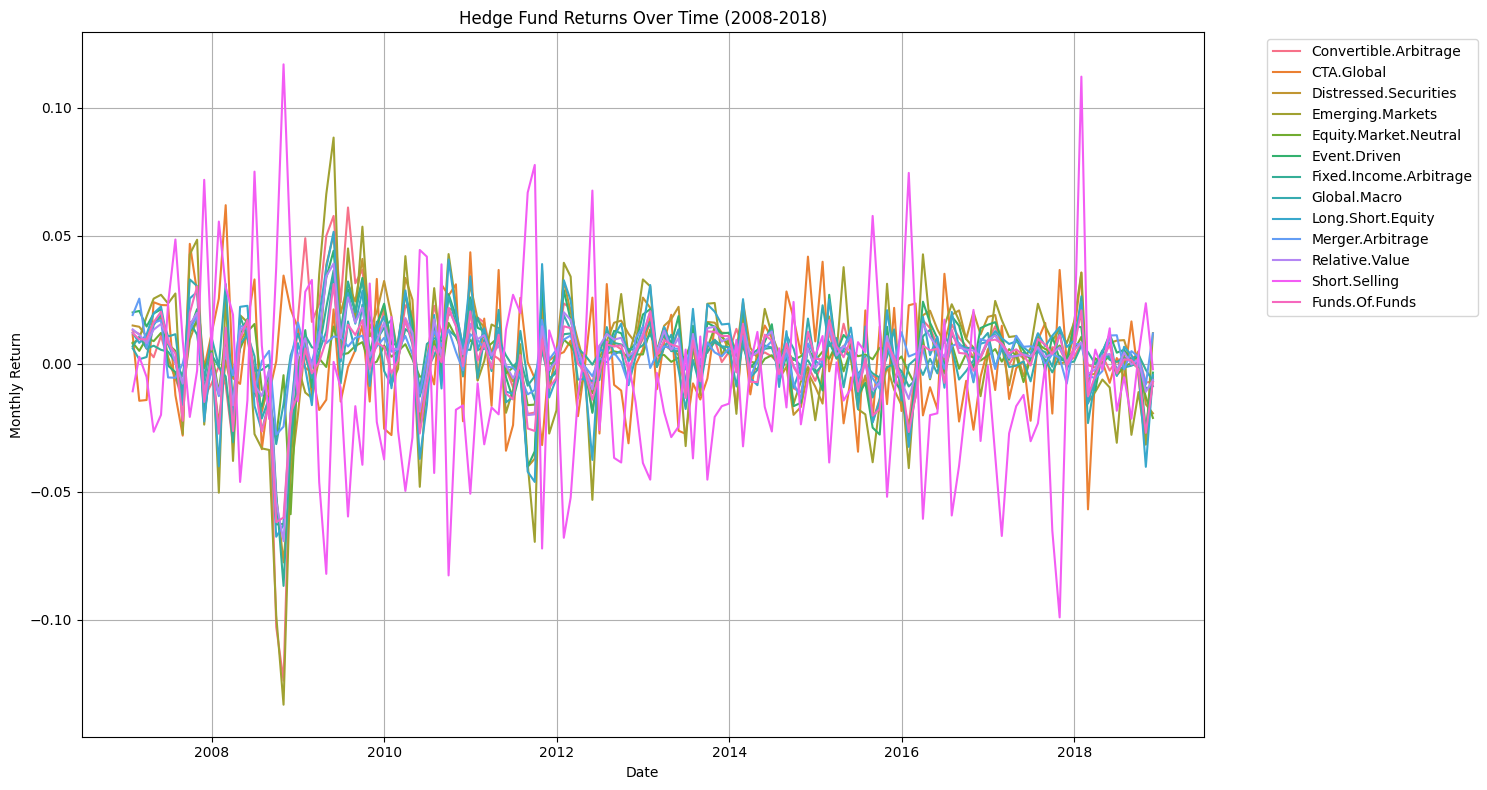

In [ ]:
plt.figure(figsize=(15, 8))

# Melt the DataFrame to long format for plotting multiple lines easily
df_melted = hfdata_filtered_2008_2018.melt(id_vars=['date'], var_name='Hedge Fund Strategy', value_name='Return')

sns.lineplot(data=df_melted, x='date', y='Return', hue='Hedge Fund Strategy')

plt.title('Hedge Fund Returns Over Time (2008-2018)')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
average_returns = hfdata_filtered_2008_2018.drop(columns=['date']).mean()
print("Average Monthly Return for Each Hedge Fund Strategy (2008-2018):")
print(average_returns)

Average Monthly Return for Each Hedge Fund Strategy (2008-2018):
Convertible.Arbitrage     0.003736
CTA.Global                0.002141
Distressed.Securities     0.004320
Emerging.Markets          0.002953
Equity.Market.Neutral     0.002099
Event.Driven              0.003918
Fixed.Income.Arbitrage    0.003679
Global.Macro              0.002872
Long.Short.Equity         0.003631
Merger.Arbitrage          0.003551
Relative.Value            0.004078
Short.Selling            -0.006064
Funds.Of.Funds            0.001241
dtype: float64


In [ ]:
# Check for duplicate rows
duplicate_rows = hfdata_filtered_2008_2018.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Check for null values
print("\nNumber of null values per column:")
print(hfdata_filtered_2008_2018.isnull().sum())

Number of duplicate rows: 0

Number of null values per column:
date                      0
Convertible.Arbitrage     0
CTA.Global                0
Distressed.Securities     0
Emerging.Markets          0
Equity.Market.Neutral     0
Event.Driven              0
Fixed.Income.Arbitrage    0
Global.Macro              0
Long.Short.Equity         0
Merger.Arbitrage          0
Relative.Value            0
Short.Selling             0
Funds.Of.Funds            0
dtype: int64


### Data cleaning

In [ ]:
#data parsing coverting the date column from text to datetime for
#time-series analysis
hfdata_filtered_2008_2018['date'] = pd.to_datetime(hfdata_filtered_2008_2018['date'])
hfdata_filtered_2008_2018.head()
hfdata_filtered_2008_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 120 to 262
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    143 non-null    datetime64[ns]
 1   Convertible.Arbitrage   143 non-null    float64       
 2   CTA.Global              143 non-null    float64       
 3   Distressed.Securities   143 non-null    float64       
 4   Emerging.Markets        143 non-null    float64       
 5   Equity.Market.Neutral   143 non-null    float64       
 6   Event.Driven            143 non-null    float64       
 7   Fixed.Income.Arbitrage  143 non-null    float64       
 8   Global.Macro            143 non-null    float64       
 9   Long.Short.Equity       143 non-null    float64       
 10  Merger.Arbitrage        143 non-null    float64       
 11  Relative.Value          143 non-null    float64       
 12  Short.Selling           143 non-null    float64      

In [ ]:
# Set date as the index (crucial for time-series analysis)
hfdata_filtered_2008_2018.set_index('date', inplace=True)
hfdata_filtered_2008_2018.head()

,Convertible.Arbitrage,CTA.Global,Distressed.Securities,Emerging.Markets,Equity.Market.Neutral,Event.Driven,Fixed.Income.Arbitrage,Global.Macro,Long.Short.Equity,Merger.Arbitrage,Relative.Value,Short.Selling,Funds.Of.Funds
date,,,,,,,,,,,,,
2007-01-31,0.0130,0.0113,0.0150,0.0079,0.0083,0.0201,0.0069,0.0061,0.0121,0.0191,0.0135,-0.0107,0.0121
2007-02-28,0.0117,-0.0144,0.0145,0.0100,0.0051,0.0207,0.0106,0.0018,0.0082,0.0255,0.0114,0.0028,0.0096
2007-03-31,0.0060,-0.0141,0.0108,0.0185,0.0101,0.0146,0.0060,0.0027,0.0115,0.0063,0.0081,-0.0051,0.0096
2007-04-30,0.0026,0.0241,0.0164,0.0255,0.0089,0.0197,0.0071,0.0152,0.0198,0.0160,0.0134,-0.0265,0.0163
2007-05-31,0.0110,0.0230,0.0180,0.0270,0.0121,0.0213,0.0055,0.0192,0.0224,0.0171,0.0156,-0.0199,0.0204


In [ ]:
# Clean column names: Replace dots with underscores for easier coding
hfdata_filtered_2008_2018.columns = hfdata_filtered_2008_2018.columns.str.replace('.', '_')

In [ ]:
import pandas_datareader as pdr

# Define start and end dates for CPI data
start_date = '2007-12-01'
end_date = '2018-12-31'

# Fetch CPI data using FRED API
cpi_data = pdr.DataReader('CPIAUCSL', 'fred', start=start_date, end=end_date, api_key=fred_api_key)

# Display the first few rows and information of the CPI data
print("CPI Data Head:")
print(cpi_data.head())
print("\nCPI Data Info:")
print(cpi_data.info())

CPI Data Head:
            CPIAUCSL
DATE                
2007-12-01   211.445
2008-01-01   212.174
2008-02-01   212.687
2008-03-01   213.448
2008-04-01   213.942

CPI Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2007-12-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  133 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB
None


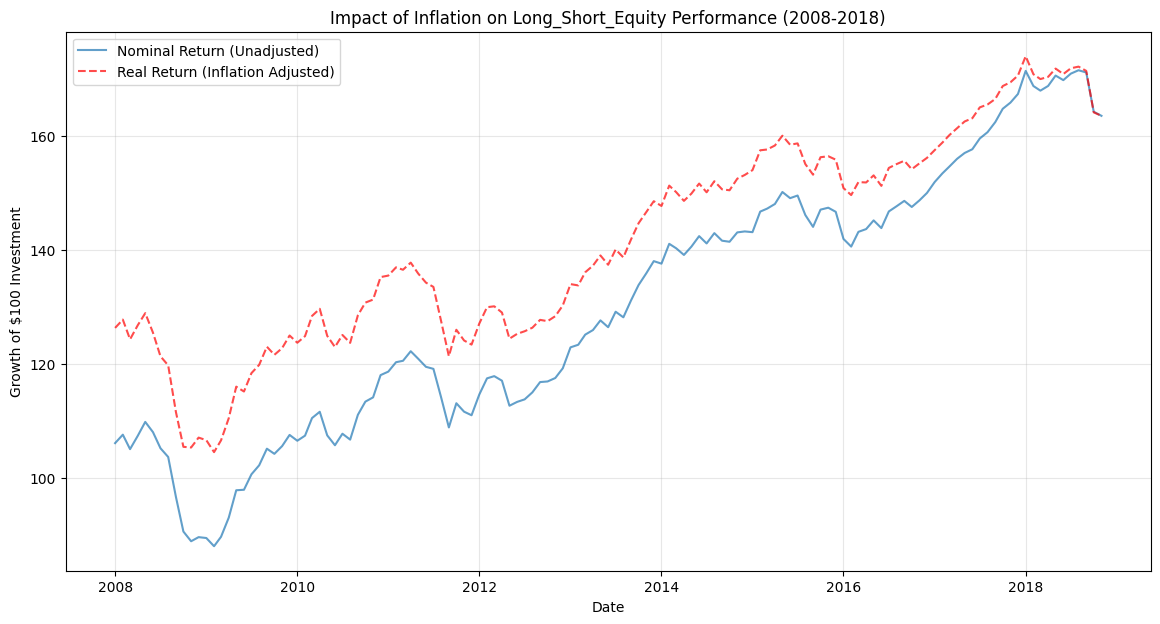


Real (Inflation-Adjusted) Returns (Head):


,Convertible_Arbitrage,CTA_Global,Distressed_Securities,Emerging_Markets,Equity_Market_Neutral,Event_Driven,Fixed_Income_Arbitrage,Global_Macro,Long_Short_Equity,Merger_Arbitrage,Relative_Value,Short_Selling,Funds_Of_Funds
date,,,,,,,,,,,,,
2008-01,-0.004333,0.021977,-0.026656,-0.053563,-0.014597,-0.030443,-0.004632,-0.004432,-0.043298,-0.015993,-0.015195,0.051973,-0.030542
2008-02,-0.010692,0.059438,-0.001015,0.025520,0.009559,0.005968,-0.007300,0.028713,0.011554,0.003574,0.003973,0.027516,0.011754
2008-03,-0.035152,-0.009145,-0.016120,-0.041330,-0.008448,-0.020305,-0.034056,-0.020405,-0.027081,-0.008049,-0.019708,0.015566,-0.029672
2008-04,0.005273,-0.010091,0.006471,0.016647,0.003577,0.009464,0.016348,0.005473,0.019939,0.012557,0.010661,-0.048303,0.007369
2008-05,0.004754,0.010222,0.007737,0.010321,0.006643,0.011614,0.004357,0.005450,0.016684,0.007637,0.009924,-0.019999,0.011216



Real (Inflation-Adjusted) Returns (Tail):


,Convertible_Arbitrage,CTA_Global,Distressed_Securities,Emerging_Markets,Equity_Market_Neutral,Event_Driven,Fixed_Income_Arbitrage,Global_Macro,Long_Short_Equity,Merger_Arbitrage,Relative_Value,Short_Selling,Funds_Of_Funds
date,,,,,,,,,,,,,
2018-07,0.001318,-0.006576,0.008513,0.003217,-0.001779,0.004715,0.001418,-0.002179,0.005915,-0.002879,0.003716,-0.005976,0.001018
2018-08,0.000612,0.014786,-0.001584,-0.029435,-0.001385,-0.000686,-0.000087,-0.002483,0.001710,0.003207,-0.001984,-0.023146,-0.000287
2018-09,0.001335,-0.007447,0.002932,-0.013035,-0.003655,0.001135,0.001535,-0.001459,-0.004353,0.000736,-0.000262,0.001535,-0.004254
2018-10,-0.009617,-0.033661,-0.018097,-0.033761,-0.015204,-0.027974,-0.004629,-0.011912,-0.042440,-0.010315,-0.013209,0.021311,-0.029171
2018-11,-0.006100,-0.004599,-0.018609,0.012713,-0.020410,-0.002698,-0.006000,-0.008001,-0.003698,0.012613,-0.005600,-0.001397,-0.006400


In [ ]:
import matplotlib.pyplot as plt

# 3. Adjust for Inflation (Redefining the function to ensure it's in scope and fixing index handling)
def adjust_to_real_returns(returns_df, cpi_df):
    returns = returns_df.copy()
    # Convert returns_df index to PeriodIndex for consistent merging
    returns.index = returns.index.to_period('M')

    cpi = cpi_df.copy()
    # Ensure CPI index is also PeriodIndex for consistent merging
    cpi.index = cpi.index.to_period('M')
    # Select only the CPI column, assuming it's already renamed to 'CPI' or will be before passing.
    # If the cpi_df column is still 'CPIAUCSL', rename it here again for robustness.
    if 'CPIAUCSL' in cpi.columns:
        cpi = cpi.rename(columns={'CPIAUCSL': 'CPI'})
    cpi = cpi[['CPI']]

    # Step A: Create Nominal Wealth Index (Start at 100)
    # The index of nominal_wealth will now be PeriodIndex
    nominal_wealth = (1 + returns).cumprod() * 100

    # Step B: Merge with CPI. Both indices are now PeriodIndex('M')
    merged = nominal_wealth.merge(cpi, left_index=True, right_index=True, how='left')

    # Step C: Calculate Real Wealth (Deflate by CPI)
    # Formula: Real Value = Nominal Value * (Target_CPI / Current_CPI)
    # We adjust everything to the "Latest" dollar value available in your data
    latest_cpi = merged['CPI'].iloc[-1]

    real_wealth = pd.DataFrame(index=merged.index)
    for col in nominal_wealth.columns:
        # Adjust column by the CPI ratio
        real_wealth[col] = merged[col] * (latest_cpi / merged['CPI'])

    # Step D: Convert Real Wealth back to Real Monthly Returns
    real_returns = real_wealth.pct_change(fill_method=None)

    return nominal_wealth, real_wealth, real_returns

# Ensure CPI data column name matches expectation of adjust_to_real_returns function
cpi_data_cleaned = cpi_data.rename(columns={'CPIAUCSL': 'CPI'})

# Run the adjustment with the full hfdata_filtered_2008_2018 (which includes 2007 data for calculation)
nominal_wealth_full, real_wealth_full, real_returns_full = adjust_to_real_returns(hfdata_filtered_2008_2018, cpi_data_cleaned)

# Filter the results to start from January 2008, ensuring January 2008 returns are calculated
nominal_wealth = nominal_wealth_full[nominal_wealth_full.index >= '2008-01']
real_wealth = real_wealth_full[real_wealth_full.index >= '2008-01']
real_returns = real_returns_full[real_returns_full.index >= '2008-01']

# 4. Visualize the Impact
plt.figure(figsize=(14, 7))
strategy = 'Long_Short_Equity' # Example strategy, using cleaned column name

# nominal_wealth.index and real_wealth.index are now PeriodIndex objects, so .to_timestamp() is correct.
plt.plot(nominal_wealth.index.to_timestamp(), nominal_wealth[strategy],
         label=f'Nominal Return (Unadjusted)', alpha=0.7)
plt.plot(real_wealth.index.to_timestamp(), real_wealth[strategy],
         label=f'Real Return (Inflation Adjusted)', linestyle='--', color='red', alpha=0.7)

plt.title(f'Impact of Inflation on {strategy} Performance (2008-2018)')
plt.xlabel('Date')
plt.ylabel('Growth of $100 Investment')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. View the Real Returns Data
print("\nReal (Inflation-Adjusted) Returns (Head):")
display(real_returns.head())
print("\nReal (Inflation-Adjusted) Returns (Tail):")
display(real_returns.tail())

In [ ]:
output_folder = '/content/drive/MyDrive/data analysis and mining/CSC1171 Project/Datasets/cleaned_dataset'
output_filename = 'hedgefund_data_2008_2018_real_returns.csv'
full_output_path = f'{output_folder}/{output_filename}'

# Save the DataFrame to CSV, including the date index as a column
# The real_returns DataFrame contains the inflation-adjusted data from Jan 2008 to Nov 2018
real_returns.to_csv(full_output_path, index=True)
print(real_returns.head())
print(f"Cleaned and inflation-adjusted data saved to: {full_output_path}")

         Convertible_Arbitrage  CTA_Global  Distressed_Securities  \
date                                                                
2008-01              -0.004333    0.021977              -0.026656   
2008-02              -0.010692    0.059438              -0.001015   
2008-03              -0.035152   -0.009145              -0.016120   
2008-04               0.005273   -0.010091               0.006471   
2008-05               0.004754    0.010222               0.007737   

         Emerging_Markets  Equity_Market_Neutral  Event_Driven  \
date                                                             
2008-01         -0.053563              -0.014597     -0.030443   
2008-02          0.025520               0.009559      0.005968   
2008-03         -0.041330              -0.008448     -0.020305   
2008-04          0.016647               0.003577      0.009464   
2008-05          0.010321               0.006643      0.011614   

         Fixed_Income_Arbitrage  Global_Macro  Long_S